<a href="https://www.kaggle.com/code/bhavkaur/hotel-guests-multiclass-classification?scriptVersionId=133991743" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<img src="https://raw.githubusercontent.com/Bhavleenk/Kaggle-Notebooks/main/Hotel_Guests_Classification/dataset-cover.jpg" width=1000>

# **Hotel Guest Multiclass Classification**

# Importing Libraries

In [104]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))    
plt.style.use('dark_background')

/kaggle/input/hotel-guests-dataset/hotel_guests_dataset.csv


# Importing Dataset

In [105]:
hotel_data = pd.read_csv("/kaggle/input/hotel-guests-dataset/hotel_guests_dataset.csv")

# Data Cleaning

In [106]:
hotel_data.head()

,Unnamed: 0,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,0,dsullivan@example.net,False,BASIC,8.324971,04 Apr 2020,23 Apr 2020,146.834507,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983
1,1,steven59@example.org,False,BASIC,NaN,27 Jun 2020,16 Aug 2020,185.497813,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690
2,2,brandon15@example.net,False,BASIC,22.269158,13 Apr 2020,07 Apr 2020,151.115528,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788
3,3,humphreyjennifer@example.net,False,BASIC,25.468647,22 May 2020,08 Jun 2020,182.468031,"9301 John Parkways\nThomasland, OH 61350",3524946844839485
4,4,joshuabrown@example.net,False,BASIC,19.778311,14 Nov 2019,27 Oct 2019,195.497743,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978


In [107]:
hotel_data.drop(['Unnamed: 0','guest_email','checkin_date','checkout_date','billing_address','credit_card_number'], inplace=True, axis=1)

In [108]:
hotel_data.isna().sum()

has_rewards        0
room_type          0
amenities_fee    184
room_rate          0
dtype: int64

In [109]:
hotel_data.dropna(inplace=True)

In [110]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1816 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   has_rewards    1816 non-null   bool   
 1   room_type      1816 non-null   object 
 2   amenities_fee  1816 non-null   float64
 3   room_rate      1816 non-null   float64
dtypes: bool(1), float64(2), object(1)
memory usage: 58.5+ KB


In [111]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
hotel_data['room_type']= label_encoder.fit_transform(hotel_data['room_type'])

hotel_data["has_rewards"] = hotel_data.has_rewards.astype(int)

In [112]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1816 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   has_rewards    1816 non-null   int64  
 1   room_type      1816 non-null   int64  
 2   amenities_fee  1816 non-null   float64
 3   room_rate      1816 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 70.9 KB


# Exploratory Data Analysis

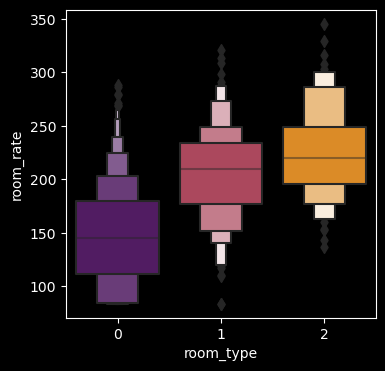

In [113]:
plt.figure(figsize=(4,4))
sns.boxenplot(x=hotel_data['room_type'], y=hotel_data['room_rate'], palette='inferno');

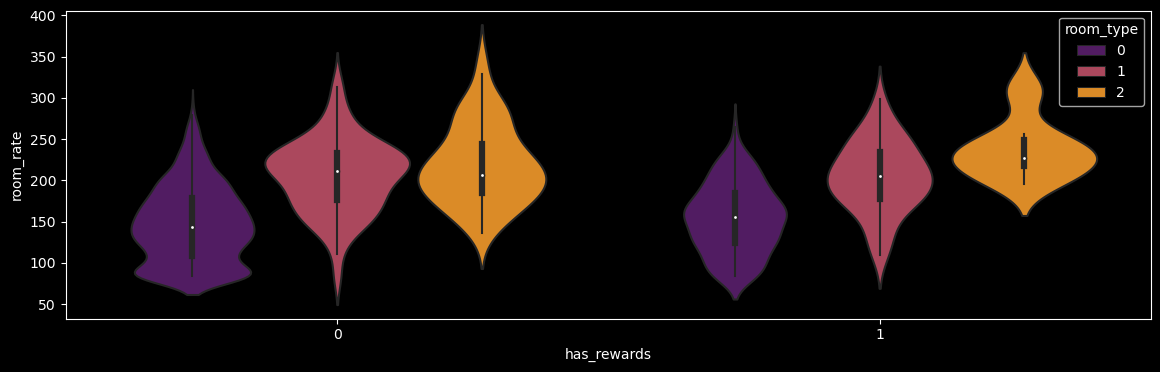

In [114]:
plt.figure(figsize=(14,4))
sns.violinplot(data=hotel_data,y="room_rate", x="has_rewards", palette='inferno',hue="room_type");

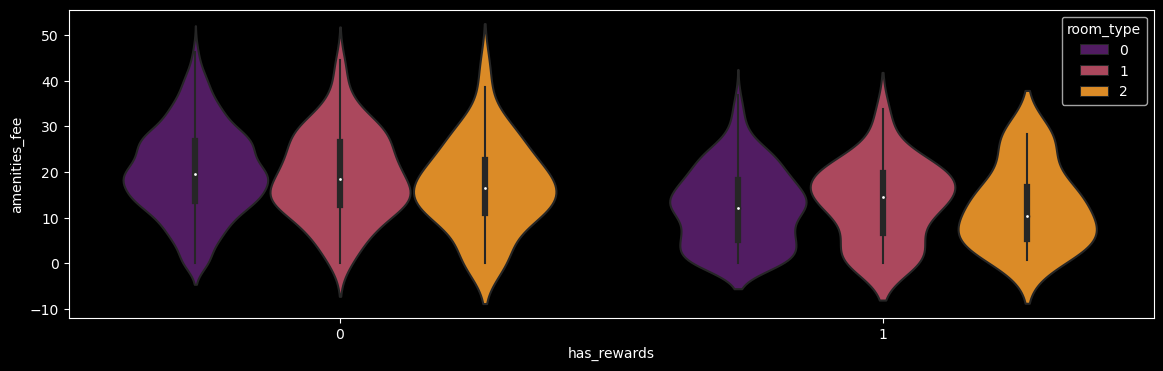

In [115]:
plt.figure(figsize=(14,4))
sns.violinplot(data=hotel_data,y="amenities_fee", x="has_rewards", palette='inferno',hue="room_type");

# Training Models

In [118]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [128]:
target_col='room_type'
features = [i for i in hotel_data.columns]
features.remove('room_type')
X=hotel_data[features]
y=hotel_data[target_col]

In [138]:
X_train,X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [139]:
rfmodel=RandomForestClassifier()
rfmodel.fit(X_train, Y_train)
rfpred = rfmodel.predict(X_test)

In [140]:
xgmodel=XGBClassifier()
xgmodel.fit(X_train, Y_train)
xgpred = xgmodel.predict(X_test)

In [141]:
gbmodel=GradientBoostingClassifier()
gbmodel.fit(X_train, Y_train)
gbpred = gbmodel.predict(X_test)

# Testing Models

In [142]:
print("Accuracy of RandomForestClassifier : ",accuracy_score(Y_test, rfpred))
print("Accuracy of XGBClassifier : ",accuracy_score(Y_test, xgpred))
print("Accuracy of GradientBoostingClassifier : ",accuracy_score(Y_test, gbpred))

Accuracy of RandomForestClassifier :  0.8642201834862385
Accuracy of XGBClassifier :  0.8532110091743119
Accuracy of GradientBoostingClassifier :  0.8495412844036697
